Условие сходимости соблюдено: s = 0.10 <= 0.5


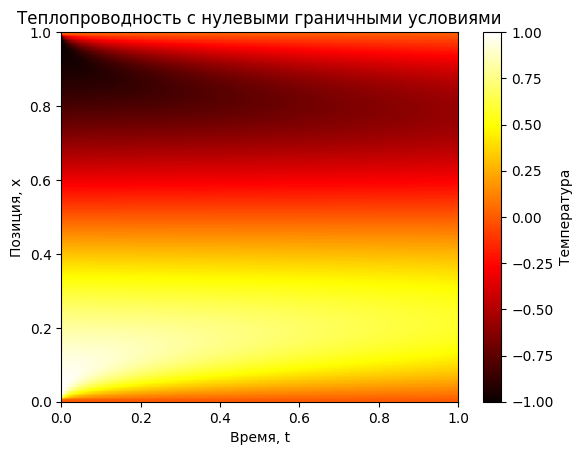

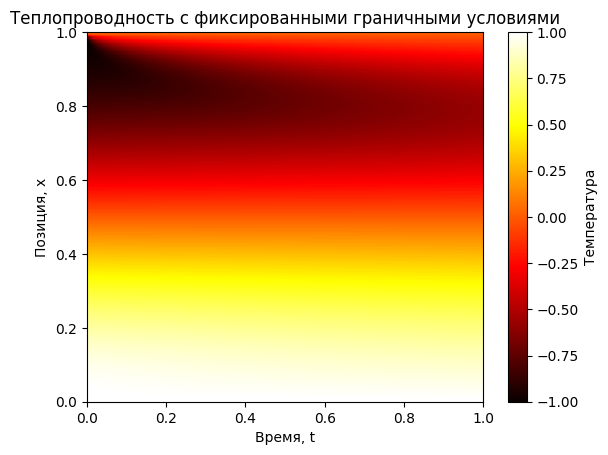

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
L = 1.0  # длина стержня
T = 1.0  # общее время моделирования
a = 0.01  # коэффициент теплопроводности

# Параметры сетки
Nx = 100  # количество точек по пространству
Nt = 1000  # количество временных шагов
dx = L / Nx  # шаг по пространству
dt = T / Nt  # шаг по времени

# Создание сетки
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# Начальное условие
u = np.zeros((Nx, Nt))
u[:, 0] = np.cos(np.pi * x)  # u(x, 0) = cos(pi*x)

# Проверка условия сходимости для явной схемы
s = a * dt / dx**2
if s > 0.5:
    convergence_warning = "Внимание: условие сходимости нарушено! s = {:.2f} > 0.5".format(s)
else:
    convergence_warning = "Условие сходимости соблюдено: s = {:.2f} <= 0.5".format(s)

# Вывод результатов проверки условия сходимости
print(convergence_warning)

# Реализация явной схемы с нулевыми граничными условиями
for k in range(0, Nt - 1):  # итерации по времени
    for i in range(1, Nx - 1):  # итерации по пространству
        # Явная схема
        u[i, k + 1] = u[i, k] + s * (u[i + 1, k] - 2 * u[i, k] + u[i - 1, k])

    # Нулевые граничные условия
    u[0, k + 1] = 0
    u[Nx - 1, k + 1] = 0

# Визуализация результатов
plt.imshow(u, extent=[0, T, 0, L], origin='lower', aspect='auto' , cmap='hot')
plt.colorbar(label='Температура')
plt.xlabel('Время, t')
plt.ylabel('Позиция, x')
plt.title('Теплопроводность с нулевыми граничными условиями')
plt.show()


# Реализация явной схемы с фиксированными положительными граничными условиями
# Переопределение начального условия
u[:, 0] = np.cos(np.pi * x)  # u(x, 0) = cos(pi*x)

for k in range(0, Nt - 1):  # итерации по времени
    for i in range(1, Nx - 1):  # итерации по пространству
        # Явная схема
        u[i, k + 1] = u[i, k] + s * (u[i + 1, k] - 2 * u[i, k] + u[i - 1, k])

    # Фиксированные положительные граничные условия
    u[0, k + 1] = 1  # u(0, t) = 1
    u[Nx - 1, k + 1] = 0  # u(L, t) = 0

# Визуализация результатов
plt.imshow(u, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Температура')
plt.xlabel('Время, t')
plt.ylabel('Позиция, x')
plt.title('Теплопроводность с фиксированными граничными условиями')
plt.show()

Условие сходимости соблюдено: s = 0.20 <= 0.5


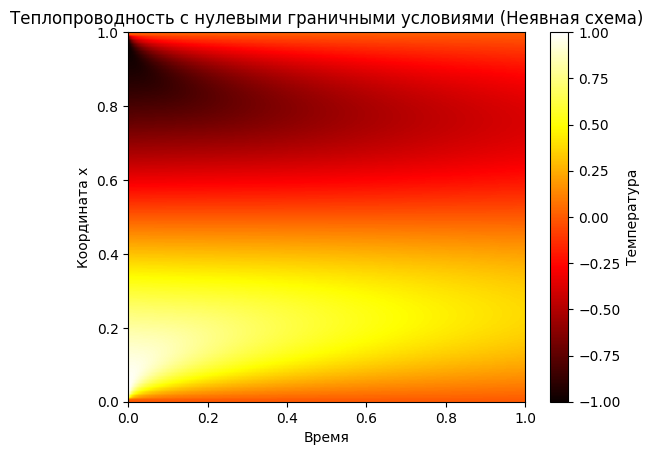

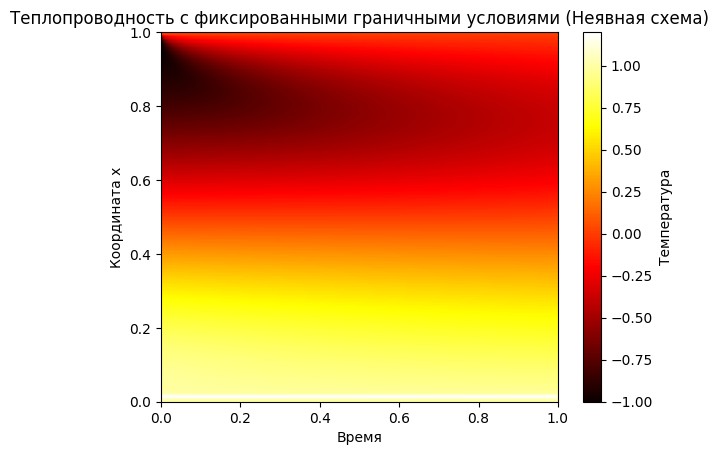

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры модели
L = 1.0  # длина стержня
T = 1.0  # общее время моделирования
a = 0.02  # коэффициент теплопроводности

# Параметры сетки
Nx = 100  # количество точек по пространству
Nt = 1000  # количество временных шагов
dx = L / Nx  # шаг по пространству
dt = T / Nt  # шаг по времени

# Создание сетки
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# Проверка условия сходимости для явной схемы (чтобы сравнить)
s = a * dt / dx**2
if s > 0.5:
    convergence_warning = "Внимание: условие сходимости нарушено! s = {:.2f} > 0.5".format(s)
else:
    convergence_warning = "Условие сходимости соблюдено: s = {:.2f} <= 0.5".format(s)

# Вывод результатов проверки условия сходимости
print(convergence_warning)

# Формирование трехдиагональной матрицы для неявной схемы
# Коэффициенты для трехдиагональной матрицы
alpha = -s
beta = 1 + 2 * s
gamma = -s

# Создание трехдиагональной матрицы
A = np.zeros((Nx - 2, Nx - 2))  # матрица размером (Nx-2) x (Nx-2)
for i in range(Nx - 2):
    A[i, i] = beta
    if i > 0:
        A[i, i - 1] = alpha
    if i < Nx - 3:
        A[i, i + 1] = gamma


# Основная функция метода прогонки
def thomas_algorithm_fixed(A, b):
    n = len(b)
    P = np.zeros(n)
    Q = np.zeros(n)
    
    # Инициализация первых коэффициентов P и Q
    P[0] = -A[0, 1] / A[0, 0]
    Q[0] = b[0] / A[0, 0]
    
    # Вычисление коэффициентов P и Q
    for i in range(1, n - 1):  # Изменение границ цикла
        P[i] = -A[i, i + 1] / (A[i, i] + A[i, i - 1] * P[i - 1])
        Q[i] = (b[i] - A[i, i - 1] * Q[i - 1]) / (A[i, i] + A[i, i - 1] * P[i - 1])

    # Обработка последнего элемента отдельно
    P[-1] = 0
    Q[-1] = (b[-1] - A[-1, -2] * Q[-2]) / (A[-1, -1] + A[-1, -2] * P[-2])
    
    # Обратный ход
    x = np.zeros(n)
    x[-1] = Q[-1]
    for i in range(n - 2, -1, -1):
        x[i] = P[i] * x[i + 1] + Q[i]
    
    return x

# Реализация метода прогонки для всех временных шагов с нулевыми граничными условиями
# Переопределение начальных условий
u = np.zeros((Nx, Nt))
u[:, 0] = np.cos(np.pi * x)

for k in range(0, Nt - 1):
    # Вектор правой части
    b = u[1:-1, k]

    # Применение метода прогонки
    u[1:-1, k + 1] = thomas_algorithm_fixed(A, b)

    # Нулевые граничные условия
    u[0, k + 1] = 0
    u[-1, k + 1] = 0

# Визуализация результатов для нулевых граничных условий
plt.imshow(u, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Температура')
plt.xlabel('Время')
plt.ylabel('Координата x')
plt.title('Теплопроводность с нулевыми граничными условиями (Неявная схема)')
plt.show()

# Реализация метода прогонки для всех временных шагов с фиксированными положительными граничными условиями
# Переопределение начальных условий
u = np.zeros((Nx, Nt))
u[:, 0] = np.cos(np.pi * x)

for k in range(0, Nt - 1):
    # Вектор правой части с учетом граничных условий
    b = u[1:-1, k]
    b[0] -= alpha * 1  # u(0, t) = 1
    b[-1] -= gamma * 0  # u(L, t) = 0

    # Применение метода прогонки
    u[1:-1, k + 1] = thomas_algorithm_fixed(A, b)

    # Фиксированные положительные граничные условия
    u[0, k + 1] = 1
    u[-1, k + 1] = 0

# Визуализация результатов для фиксированных положительных граничных условий
plt.imshow(u, extent=[0, T, 0, L], origin='lower', aspect='auto',  cmap='hot')
plt.colorbar(label='Температура')
plt.xlabel('Время')
plt.ylabel('Координата x')
plt.title('Теплопроводность с фиксированными граничными условиями (Неявная схема)')
plt.show()
